**LOGISTIC  REGRESSION**


**Objective**- To study and understand the working of statistical model Logistic Regression.

*What is Logistic Regression?*

Logistic Regression is a statistical method used for classification of data. It is mostly used for binary classification. By Binary, we mean the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no). In other words, it used to predict the class of an information.

For Example, 
1. We want to predict whether it will rain today or not. (yes/no)
2. We want to predict if the new email is spam or not. (yes/no)
3. We want to predict whether a person will suffer from Cancer or not.(yes/no) etc.

Below image shows the classification of patients as being sick or healthy.

![](https://drive.google.com/uc?export=view&id=1mYlQniUK9f_30R8ejgFdmGyMuedEEg8M)





*How does Logistic Regression work?*

Well, Logistic Regression measures the relationship between the dependent variable (what we want to predict) and the one or more independent variables (features), by estimating probabilities.
These probabilities are then transformed into binary values (0/1) in order to make a prediction. This task is done by logistic function(also known as sigmoid function) as given below-

![alt text](https://drive.google.com/uc?export=view&id=1h-PFGz4Uy9zDdF145u2ulaTP6ZqlwlNR)



*Practical Use of Logistic Regression*

We are going to use a dataset for Heart Disease prediction which is available at https://archive.ics.uci.edu/ml/datasets/heart+Disease

**Reason to choose this dataset- Cardiovascular diseases (CVDs)/ Heart Disease are the number 1 cause of death globally, taking an estimated 17.9 million lives each year.
(Source- https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1)
So, if by monitoring and studying the patients body condition and vitals, there is chance we will be able to take necessary action before hand which may save lives. This is one of the example of how Logistic Regression can be used in the field of Bio Science.**


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
# Import the dataset and save it in a dataframe
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/heart.csv"
Df= pd.read_csv(path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
Df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

As you can see, we have the data in 14 columns and the description of each column is given as-

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
      Value 1: typical angina
      Value 2: atypical angina
      Value 3: non-anginal pain
      Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
      Value 0: normal
      Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
      Value 1: upsloping
      Value 2: flat
      Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
      Value 0: < 50% diameter narrowing (No Heart Disease)
      Value 1: > 50% diameter narrowing (Heart Disease)

Column 3-13 are all medical terminologies and body vitals of a patient which helps to predict column 14 (if the patient has heart disease or not)

Let us study our data using matplotlib and seaborn.

How is age affecting the chances of heart disease?


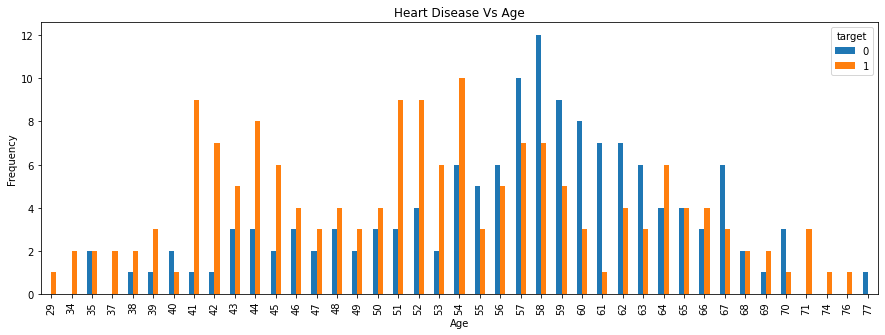

In [38]:
pd.crosstab(Df.age,Df.target).plot(kind="bar",figsize=(15,5))
plt.title('Heart Disease Vs Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Inference 1 - Clearly, patients with age 54 have slightly higher chances of Heart Disease.

How does sex of a patient affect the chances of having a Heart Disease?
Lets see.

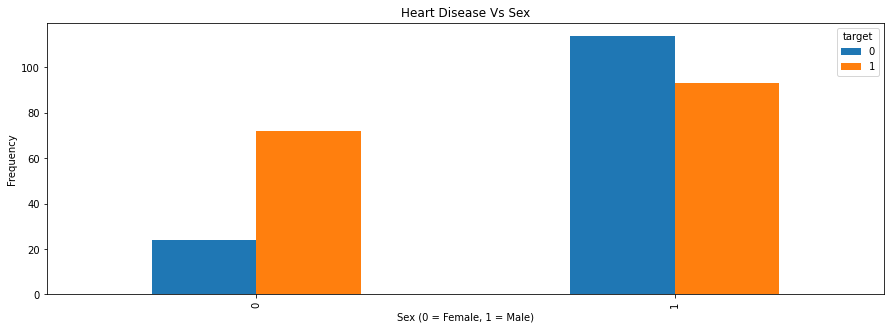

In [39]:
pd.crosstab(Df.sex,Df.target).plot(kind="bar",figsize=(15,5))
plt.title('Heart Disease Vs Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()

Inference 2- Males have higher chances of heart Disease.

How does Cholestrol level fluctuate in both the type of patients?

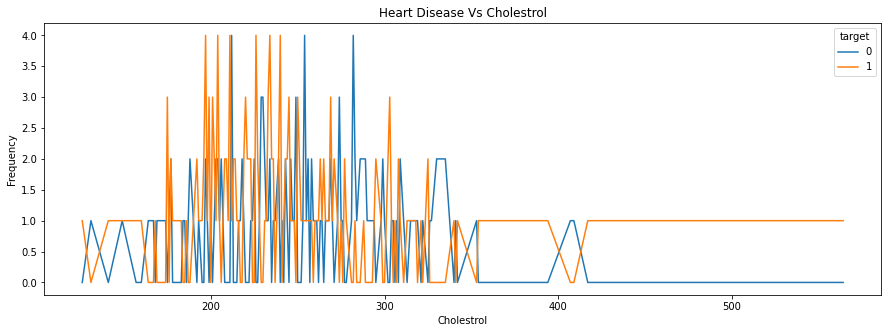

In [40]:
pd.crosstab(Df.chol,Df.target).plot(kind="line",figsize=(15,5))
plt.title('Heart Disease Vs Cholestrol')
plt.xlabel('Cholestrol')
plt.ylabel('Frequency')
plt.show()

Inference 3- Higher cholestrol levels result in Heart Disease.

How does the heart rate affect the chances of heart disease?


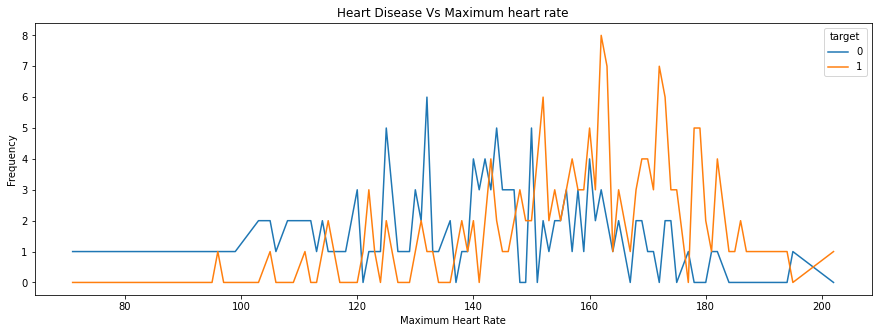

In [41]:
pd.crosstab(Df.thalach,Df.target).plot(kind="line",figsize=(15,5))
plt.title('Heart Disease Vs Maximum heart rate')
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Frequency")
plt.show()

Inference 4- There is higher chance of heart rate to be between 160 to 180 for patients with heart Disease.

Pheww!! That's all about Data exploration.


In [42]:
# Check the datatype of each column
Df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_Data = scaler.fit_transform(Df)
scaled_Data.shape

(303, 14)

In [44]:
Df = pd.DataFrame(scaled_Data, index=Df.index, columns=Df.columns[0:14])
Df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0.0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0.0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0.0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0.0


In [45]:
Y = Df.target.values
X = Df.drop(['target'], axis = 1)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=5)

In [47]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 5) 
classifier.fit(X_train, Y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We have trained the model on X_train and Y_train and now we shall predict the Y values for X_test and see if the predictions done by the model are correct or not using the performance metrics.

In [48]:
Y_pred = classifier.predict(X_test) 

To check if the predictions are correct we will use Confusion Matrix.



In [49]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(Y_test, Y_pred)) 

Accuracy :  0.8852459016393442


So the accuracy of the model is around 77% which means that our model can predict the heart disease accurately 77% of the time. 
This accuracy is very low when it comes to predicting a serious health issue. There are ways to increase the accuracy. Let us analyze other metrics.

In [33]:
from sklearn.metrics import confusion_matrix 
c_m = confusion_matrix(Y_test, Y_pred) 

print ("Confusion Matrix : \n", c_m) 

Confusion Matrix : 
 [[26  4]
 [ 3 28]]


True Positive (TP) - The observation was postive(1-heart Disease) and the model has correctly predicted it.

True Negative (TN) - The observation was negative(0- No heart Disease) and the model has correctly predicted it.

False Positive (FP) - The observation was negative(0- No heart Disease) and the model has predicted it has postive (1-heart disease).

False Negative (FN) - The observation was postive(1-heart Disease) and the model has incorrectly predicted it as negative (0- no heart disease)


In [50]:
from sklearn.metrics import classification_report
print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88        30
         1.0       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61

